# Convergence and the CVL Condition

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#We are going to use the same linear 1d convergence equation 
def linearconv(nx):
    dx = 2 / (nx - 1)
    nt = 20    #nt is the number of timesteps we want to calculate
    dt = .025  #dt is the amount of time each timestep covers (delta t)
    c = 1

    u = np.ones(nx)      #defining a numpy array which is nx elements long with every value equal to 1.
    u[int(.5/dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

    un = np.ones(nx) #initializing our placeholder array, un, to hold the values we calculate for the n+1 timestep

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    plt.plot(np.linspace(0, 2, nx), u);

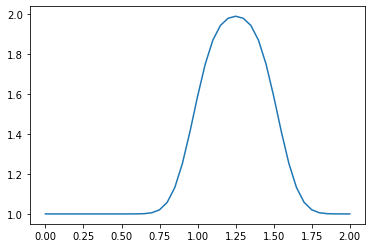

In [7]:
linearconv(41) #convection with 41 grid points

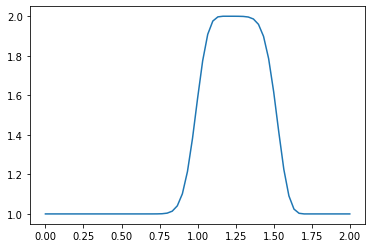

In [8]:
linearconv(61) #convection with 61 grid points

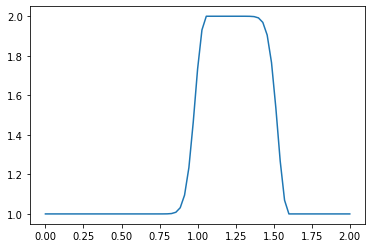

In [9]:
linearconv(71)

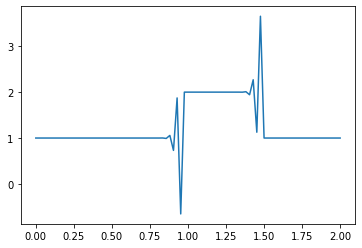

In [10]:
linearconv(85) #Something weird happens

Basically $dx$ becomes proportionally smaller than $dt$. This results in chaotic behavior. To avoid this we make the variable $dt$ be a proportion of $dx$

In [11]:
def linearconv(nx):
    dx = 2 / (nx - 1)
    nt = 20    #nt is the number of timesteps we want to calculate
    c = 1
    sigma = .5
    
    dt = sigma * dx

    u = np.ones(nx) 
    u[int(.5/dx):int(1 / dx + 1)] = 2

    un = np.ones(nx)

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    plt.plot(np.linspace(0, 2, nx), u)

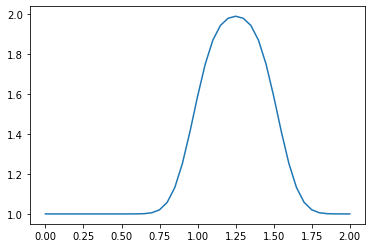

In [12]:
linearconv(41)

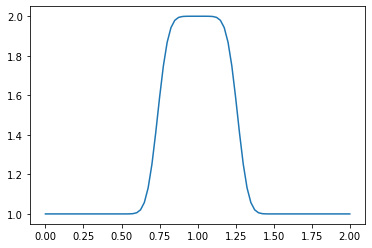

In [13]:
linearconv(81)

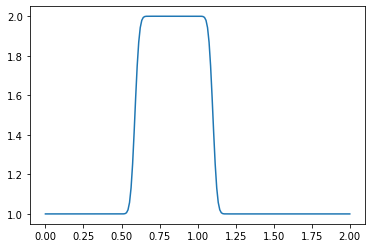

In [14]:
linearconv(200) #works now